In [ ]:
import pandas as pd
# trocar pelo caminho do seu drive
caminho = '/content/drive/MyDrive/DNSE2017.csv'

sinasc = pd.read_csv(caminho, dtype=str)

#transformacao dos dados
sinasc.PESO = pd.to_numeric(sinasc.PESO)
sinasc.IDADEMAE = pd.to_numeric(sinasc.IDADEMAE).astype(pd.Int64Dtype())
sinasc.IDADEPAI = pd.to_numeric(sinasc.IDADEPAI).astype(pd.Int64Dtype())
sinasc.QTDFILVIVO = pd.to_numeric(sinasc.QTDFILVIVO).astype(pd.Int64Dtype())
sinasc.QTDFILMORT = pd.to_numeric(sinasc.QTDFILMORT).astype(pd.Int64Dtype())
sinasc.APGAR1 = pd.to_numeric(sinasc.APGAR1).astype(pd.Int64Dtype())
sinasc.APGAR5 = pd.to_numeric(sinasc.APGAR5).astype(pd.Int64Dtype())
sinasc.SEMAGESTAC = pd.to_numeric(sinasc.SEMAGESTAC).astype(pd.Int64Dtype())
sinasc.CONSPRENAT = pd.to_numeric(sinasc.CONSPRENAT).astype(pd.Int64Dtype())
sinasc.SERIESCMAE = pd.to_numeric(sinasc.SERIESCMAE).astype(pd.Int64Dtype())
sinasc.QTDPARTCES = pd.to_numeric(sinasc.QTDPARTCES).astype(pd.Int64Dtype())
sinasc.QTDPARTNOR = pd.to_numeric(sinasc.QTDPARTNOR).astype(pd.Int64Dtype())
sinasc.QTDGESTANT = pd.to_numeric(sinasc.QTDGESTANT).astype(pd.Int64Dtype())


In [ ]:
sinasc

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,1,1,2415631,230440,1,24,2,4,999992,1,0,280030,5,1,2,4,10012017,1413,1,9,10,4,3556.0,2,16012017,NaN,20170003,3.2.01,07022017,028,NaN,823,230075,23,3,<NA>,08011993,4,1,0,1,<NA>,NaN,40,9,10,NaN,1,2,1,1,NaN,0,NaN,12,0,1,NaN,05,1,9
1,2,1,2005050,270030,1,34,5,4,622020,3,1,280600,5,1,2,3,05042017,1425,1,8,9,4,2760.0,2,03072017,NaN,20170020,3.2.01,26072017,112,NaN,827,270400,27,3,3,06011983,4,4,3,<NA>,<NA>,14072016,37,8,5,03,1,2,2,1,NaN,3,05042017,06,0,1,NaN,03,1,3
2,3,1,2005050,270030,1,19,2,4,622020,<NA>,<NA>,280120,NaN,1,2,4,03042017,1250,1,8,9,4,3010.0,2,17042017,NaN,20170011,3.2.01,20042017,017,NaN,827,270030,27,3,3,21081997,4,<NA>,<NA>,<NA>,26,NaN,<NA>,NaN,8,01,1,1,2,1,NaN,3,03042017,06,0,1,NaN,11,0,5
3,4,1,2005026,270030,1,19,2,4,999992,1,<NA>,280440,5,1,2,3,29042017,1615,2,8,9,4,3720.0,2,17052017,NaN,20170015,3.2.01,18052017,019,NaN,827,270170,27,2,8,10041998,4,1,<NA>,1,<NA>,08082016,37,8,4,04,1,1,1,1,2,3,29042017,04,0,1,NaN,05,1,2
4,5,1,2722429,270400,1,16,1,4,999991,0,4,280570,5,1,1,3,19042017,1014,1,9,10,4,2900.0,2,06062017,NaN,20170007,3.2.01,06062017,048,NaN,828,280030,28,3,1,30082000,4,0,0,0,<NA>,20072016,38,8,5,05,1,2,3,3,2,4,19042017,05,0,1,NaN,03,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33862,33863,1,2115891,314480,1,31,2,5,121010,1,0,280030,4,1,2,4,22092017,0210,1,6,7,1,2735.0,2,31102017,NaN,20170023,3.2.01,16112017,055,NaN,828,280030,28,5,<NA>,05091986,1,1,0,1,35,NaN,36,1,7,02,1,2,2,1,5,4,27092017,08,0,1,NaN,10,1,5
33863,33864,1,3137163,350610,1,26,2,4,376225,0,0,280030,5,1,2,3,15102017,0335,1,8,9,1,3230.0,2,13112017,NaN,20170021,3.2.01,16112017,032,NaN,827,270260,27,3,3,11111990,1,0,0,0,31,NaN,39,2,5,02,1,2,1,1,2,3,15102017,06,0,1,NaN,02,0,3
33864,33865,1,2755092,353800,1,26,1,5,999992,0,1,280030,5,1,2,4,24102017,1343,1,9,9,1,3640.0,2,01112017,NaN,20170045,3.2.01,08112017,015,NaN,835,354230,35,5,<NA>,03101991,1,1,0,0,28,NaN,40,1,11,01,1,2,1,1,5,4,24102017,08,0,1,NaN,04,1,5
33865,33866,1,2077574,355030,1,33,1,4,999992,1,0,280580,5,1,1,4,21082017,0828,1,8,9,4,3115.0,2,30082017,NaN,20170036,3.2.01,04092017,014,NaN,835,355030,35,3,2,15041984,4,1,1,0,38,NaN,39,1,7,01,1,1,3,1,5,4,21082017,05,0,1,NaN,04,1,5


## 1. Fazer o boxplot para idade da mãe e encontrar quais os registro de outliers.

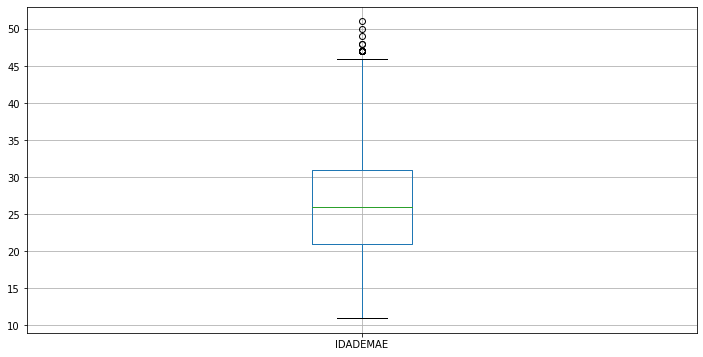

In [ ]:
#boxplot
#bp = sinasc.boxplot(column=['QTDFILVIVO'], by='IDADEMAE', figsize=(12,6))
bp = sinasc.boxplot(column=['IDADEMAE'], figsize=(12,6))

##2.Fazer o boxplot para o peso da criança e encontrar quais os registro de outliers.



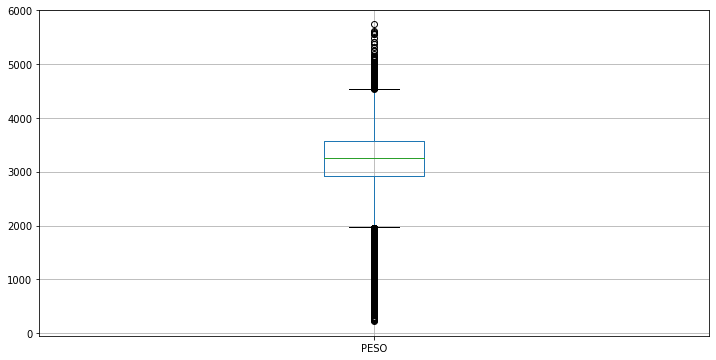

In [ ]:
#boxplot
bp = sinasc.boxplot(column=['PESO'], figsize=(12,6))

##3. Fazer o histograma da idade do pai

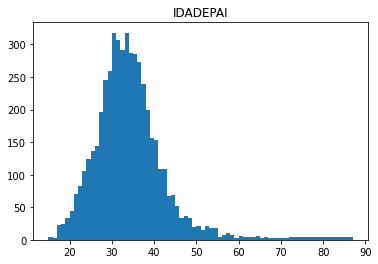

In [ ]:
bins_values = sinasc.IDADEPAI.value_counts()
hist = sinasc.hist(column='IDADEPAI', bins=sorted(bins_values.keys()), grid=False)

##4. Representar visualmente os diferentes valores de APGAR1 e APGAR5

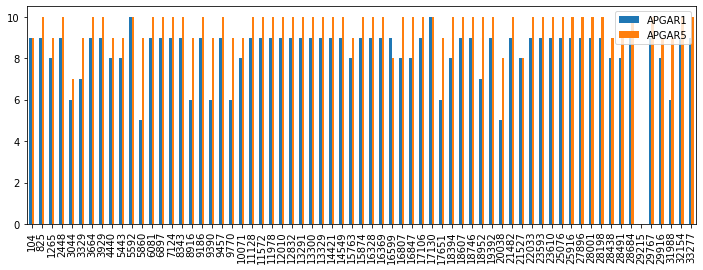

In [ ]:
viuvas_apgar = sinasc[sinasc.ESTCIVMAE == '3'][['APGAR1','APGAR5']]
barras = viuvas_apgar.plot(kind='bar', figsize=(12,4))


##5. Mostrar a dispersão entre idade do pai e idade da mãe

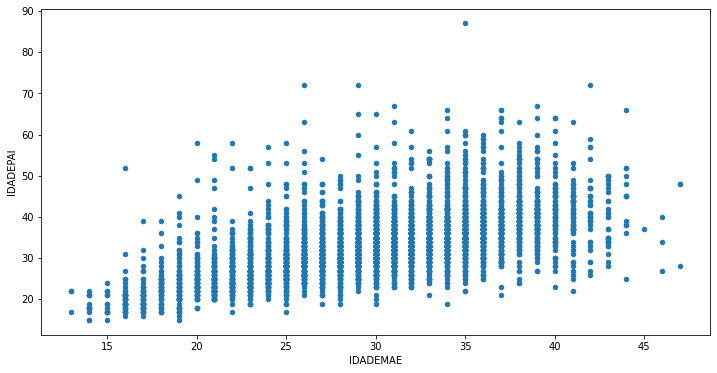

In [ ]:
sinascDisp =sinasc[['IDADEMAE', 'IDADEPAI']].dropna()
disp = sinascDisp.plot(kind='scatter', x='IDADEMAE', y='IDADEPAI', figsize=(12,6))

##6. Mostrar visualmente a comparação entre idade da mãe e idade do pai para as mães solteiras com menos de 18 anos

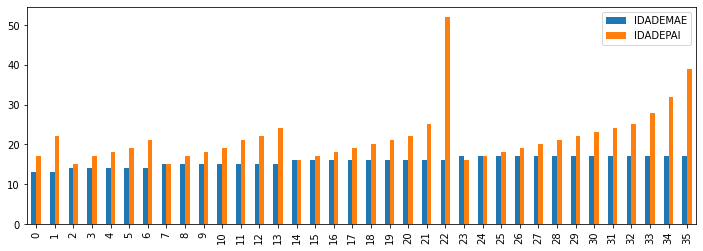

In [ ]:
idade_pai_mae = sinasc[(sinasc.ESTCIVMAE == '1') & (sinasc.IDADEMAE < 18)][['IDADEMAE','IDADEPAI']]
idade_pai_mae=idade_pai_mae.groupby(by=['IDADEMAE','IDADEPAI']).count().reset_index()
barras = idade_pai_mae.plot(kind='bar', figsize=(12,4))
#idade_pai_mae


##7. Comparar a frequência dos anos de escolaridade das mães para que residem na capital (Aracajú, CODMUNRES 2800308) e das mães em outras cidades (outros CODMUNRES).

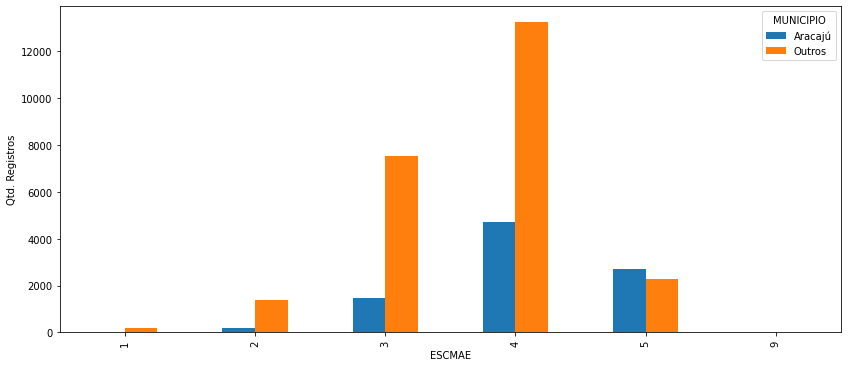

In [ ]:
def resolveMunicipio(registro):
    if registro['CODMUNRES'] == '280030':
        return 'Aracajú'
    else:
        return 'Outros'

df=sinasc[['ESCMAE','MUNICIPIO']].groupby(['ESCMAE','MUNICIPIO']).size().reset_index(name='Size')
df2=df.sort_values(by='Size',ascending=False).copy()
df2.pivot('ESCMAE', 'MUNICIPIO', 'Size').plot(kind='bar',figsize=(14,6), ylabel='Qtd. Registros')
         